In [16]:
%pip install -q sklearn matplotlib numpy torch

Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

# Importações

In [17]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

# Gerar o conjunto de dados

In [20]:
X, y = make_moons(
    n_samples=500,
    noise=0.2, 
    random_state=42
    )

Visualizar os dados

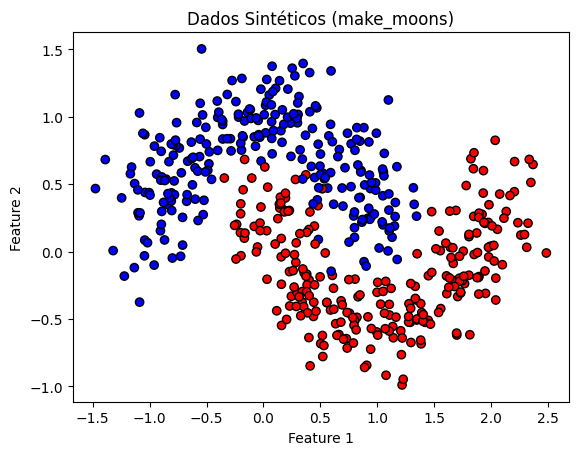

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dados Sintéticos (make_moons)')
plt.show()

# Dividir os dados em treino, validação e teste

In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Proporção dos dados:")
print(f"Treino: {X_train.shape[0]/X.shape[0]:.2f}")
print(f"Validação: {X_val.shape[0]/X.shape[0]:.2f}")
print(f"Teste: {X_test.shape[0]/X.shape[0]:.2f}")

Proporção dos dados:
Treino: 0.70
Validação: 0.15
Teste: 0.15


# Implementação da MLP

In [23]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

Converter os dados para tensores

In [24]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

Treinar modelos com diferentes números de neurônios

In [25]:

def calculate_val_loss(model, X_val_tensor, y_val_tensor, criterion = nn.BCELoss()):
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, y_val_tensor)
    return val_outputs, val_loss

def train_model(hidden_dim, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, num_epochs=1000):
    model = MLP(input_dim=2, hidden_dim=hidden_dim)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass e otimização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            _, val_loss = calculate_val_loss(model, X_val_tensor, y_val_tensor, criterion)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    return train_losses, val_losses, model

hidden_dims = [5, 10, 20, 50]
results = {}

for hidden_dim in hidden_dims:
    print(f'\nTreinando modelo com {hidden_dim} neurônios na camada oculta')
    train_losses, val_losses, model = train_model(hidden_dim, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)
    results[hidden_dim] = {'train_losses': train_losses, 'val_losses': val_losses, 'model': model}


Treinando modelo com 5 neurônios na camada oculta
Epoch [100/1000], Loss: 0.3196, Val Loss: 0.3159
Epoch [200/1000], Loss: 0.2913, Val Loss: 0.2820
Epoch [300/1000], Loss: 0.2803, Val Loss: 0.2673
Epoch [400/1000], Loss: 0.2680, Val Loss: 0.2487
Epoch [500/1000], Loss: 0.2535, Val Loss: 0.2291
Epoch [600/1000], Loss: 0.1724, Val Loss: 0.1551
Epoch [700/1000], Loss: 0.1112, Val Loss: 0.0966
Epoch [800/1000], Loss: 0.0885, Val Loss: 0.0688
Epoch [900/1000], Loss: 0.0785, Val Loss: 0.0560
Epoch [1000/1000], Loss: 0.0734, Val Loss: 0.0491

Treinando modelo com 10 neurônios na camada oculta
Epoch [100/1000], Loss: 0.2626, Val Loss: 0.2416
Epoch [200/1000], Loss: 0.1785, Val Loss: 0.1690
Epoch [300/1000], Loss: 0.1164, Val Loss: 0.1070
Epoch [400/1000], Loss: 0.0898, Val Loss: 0.0755
Epoch [500/1000], Loss: 0.0783, Val Loss: 0.0599
Epoch [600/1000], Loss: 0.0727, Val Loss: 0.0513
Epoch [700/1000], Loss: 0.0696, Val Loss: 0.0461
Epoch [800/1000], Loss: 0.0676, Val Loss: 0.0433
Epoch [900/100

Plotar as curvas de perda

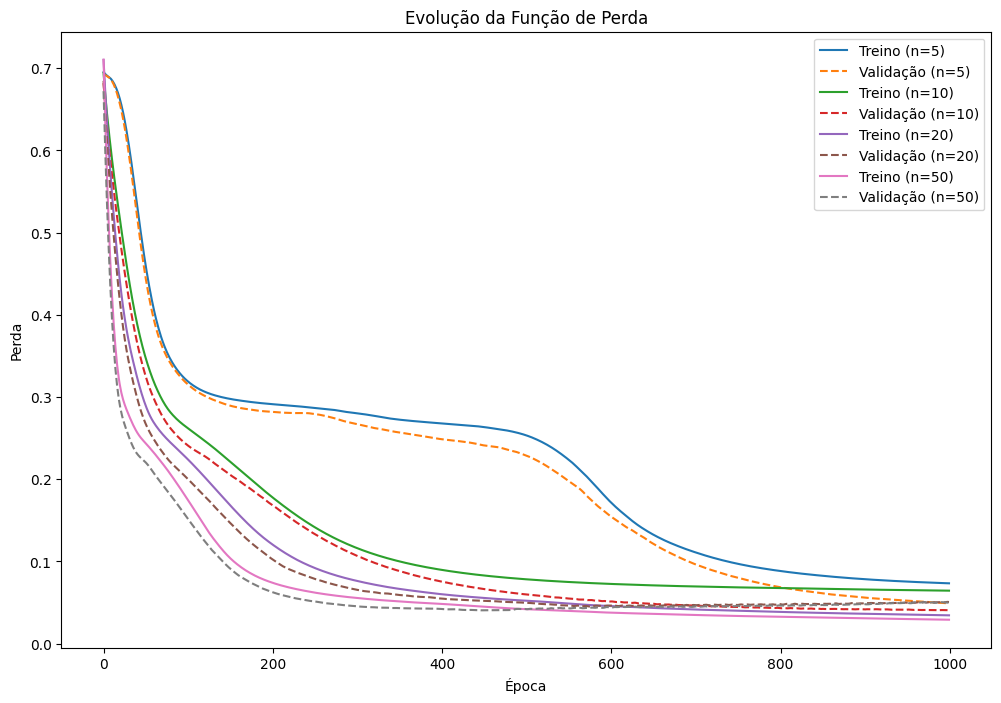

In [26]:
plt.figure(figsize=(12, 8))
for hidden_dim in hidden_dims:
    plt.plot(results[hidden_dim]['train_losses'], label=f'Treino (n={hidden_dim})')
    plt.plot(results[hidden_dim]['val_losses'], '--', label=f'Validação (n={hidden_dim})')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Evolução da Função de Perda')
plt.legend()
plt.show()

Escolher o melhor número de neurônios

In [27]:
best_hidden_dim = min(results, key=lambda k: min(results[k]['val_losses']))
best_model = results[best_hidden_dim]['model']
print(f'Melhor número de neurônios: {best_hidden_dim}')

Melhor número de neurônios: 50


Avaliar o melhor modelo no conjunto de teste

In [28]:
from utils import accuracy
criterion = nn.BCELoss()

best_model.eval()
with torch.no_grad():
    y_test_pred = best_model(X_test_tensor)
    test_loss = criterion(y_test_pred, y_test_tensor)
    test_acc = accuracy(y_test_tensor, y_test_pred)

print(f'Perda no conjunto de teste: {test_loss.item():.4f}')
print(f'Acurácia no conjunto de teste: {test_acc.item() * 100:.2f}%')


Perda no conjunto de teste: 0.0426
Acurácia no conjunto de teste: 97.33%


Plot da fronteira de decisão

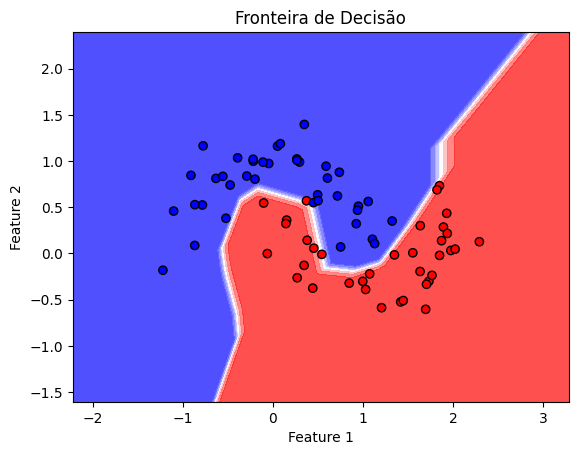

In [29]:
from utils import plot_decision_boundary

plot_decision_boundary(best_model, X_test, y_test)